# linear regression: $ell_1$, $ell_$, and `1 optimization

## Objectives

In this notebook, we will learn more about loss functions and their effect on the trained model. We will see that the difference between the model predictions and the true labels can be measured using different metrics. In the linear regression problem that we have seen before, the difference between the predicted values and the true labels is usually measured using $\ell_p$-norms and we see that different $\ell_p$-norms can result in different trained models. The list of topics of this week's discussion is as follows:
* Reiterating the residual
* Summarizing the residual vector into a number for model assessment
* Defining $\ell_p$-norms
* Experiments on different $\ell_p$-norms and their effect on the trained linear regression model

## Sources

This discussion on impact of norms in linear regression is based on the following references:
<br>
https://stackoverflow.com/questions/51883058/l1-norm-instead-of-l2-norm-for-cost-function-in-regression-model
<br>
https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms
<br>
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
<br>
https://en.wikipedia.org/wiki/Norm_(mathematics)
<br>
https://en.wikipedia.org/wiki/Lp_space

## Residual

As we saw earlier this week, in linear regression, the difference between the output of the model and the labels for each sample is computed using the residual error:
<br>
<br>
$$
e_i = y_i - \hat{y}_i
$$
Therefore, the residual error vector can be defined as:
<br>
<br>
$$
E = (e_1,e_2,\dots,e_n)^T
$$
<br>
where the $k$th element is the residual error for the $k$th sample.

## Model Assessment Based on the Residual

There is a need for summarizing the residual error vector into a number so the model can be assessed and then improved if possible. In class, we saw that defining the loss as:
<br>
<br>
$$
loss = \sum_{n=1}^{n} e_i
$$
<br>
is not a good way to measure how far off the output our model is from the true labels since negative and positive errors can cancel each other. Here we introduce norms to solve this issue. 

## $\ell_p$-Norm

In linear algebra, norm is a function which assigns a strictly positive number to a nonzero vector and it is zero if and only if the vector is zero. In a more mathematical form, norm is a scalar function $f:V\rightarrow[0, + \infty )$ with three properties. Interested students can check the Wikipedia page on norms which is one of the references of the current document. One of the norm families which is widely used in practice is $\ell_p$-norm. $\ell_p$-norm is defined as follows:
<br>
<br>
For a real number $p ≥ 1$, $\ell_p$-norm of a vector $x$ with dimensionality $n$ is defined by:
<br>
<br>
$$
{\|x\|}_p = \sqrt[{\frac{1}{p}}]{|e_1|^p+|e_2|^p+\dots+|e_n|^p}
$$
<br>
In class we saw Residual Sum of Squares (RSS), which is the square of $\ell_2$-norm. Since the function $f(x)=x^2$ is one-to-one and strictly ascending on the right side of the $y$-axis where the values of the sum $|e_1|^2+|e_2|^2+\dots+|e_n|^2$ lie, optimzing one can be translated to the other. Therefore we have seen the optimization of $\ell_2$-norm before which is a special case of the general $\ell_p$-norm. Another interesting corner case of $\ell_p$-norm happens when p goes to $+\infty$:
<br>
<br>
$$
\|x\|_{\infty}=\lim_{p \to \infty} {\|x\|}_p = \max_{i \in{1,2,\dots,n}} |x_i|
$$
<br>
which means that the $\ell_{\infty}$-norm of a vector equals the largest absolute value among all the elements.
<br>
<br>
Optimizing different norms has pros and cons. In most cases, $\ell_{2}$-norm is used but there are some instances that $L^{1}$-norm yields better results. For example, when outliers are present in the data, $\ell_{1}$-norm may yield a more robust answer compared to $\ell_{2}$-norm because it does not square the error corresponding to the outliers so they introduce less error to the model. On the other hand, $\ell_{\infty}$-norm may be used in applications where the maximum error among the samples is important rather than the overall error.
<br>
<br>
$\ell_{p}$-norms are widely used in _regularization_ which we will learn about in the future.

## Experiments

In these experiments we use a linear regression model and try different norms for measuring the loss and see their effect on the line which the model produces as the output.

First, we import the libraries that we need. The first four libraries are _pandas_, _numpy_, _matplotlib_, and _seaborn_ which we have seen previously. The fifth line imports the function _minimize_ from _scipy_ library. This optimization function is used to minimize the loss functions that we define.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

Now, we import the data. The dataset that we use here is _The Boston Housing Dataset_ which can be imported from the library _sklearn_. It contains information regarding housing in the area of Boston Mass. For more information on the dataset, check out the documentation here:
<br>
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
<br>
<br>
The dataset is not in _Pandas_ _DataFrame_ format, but rather, it is a _Bunch_ instance which is a class defined in _sklearn_. _Bunch_ has an attribute named _data_ which can be used to get the data in _numpy nd array_ format. In the following, we use the data in such format to make a _Pandas_ _DataFrame_:

In [3]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

By looking at the data, we have:

In [4]:
print (df.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


By plotting the relationships among the variables we have:

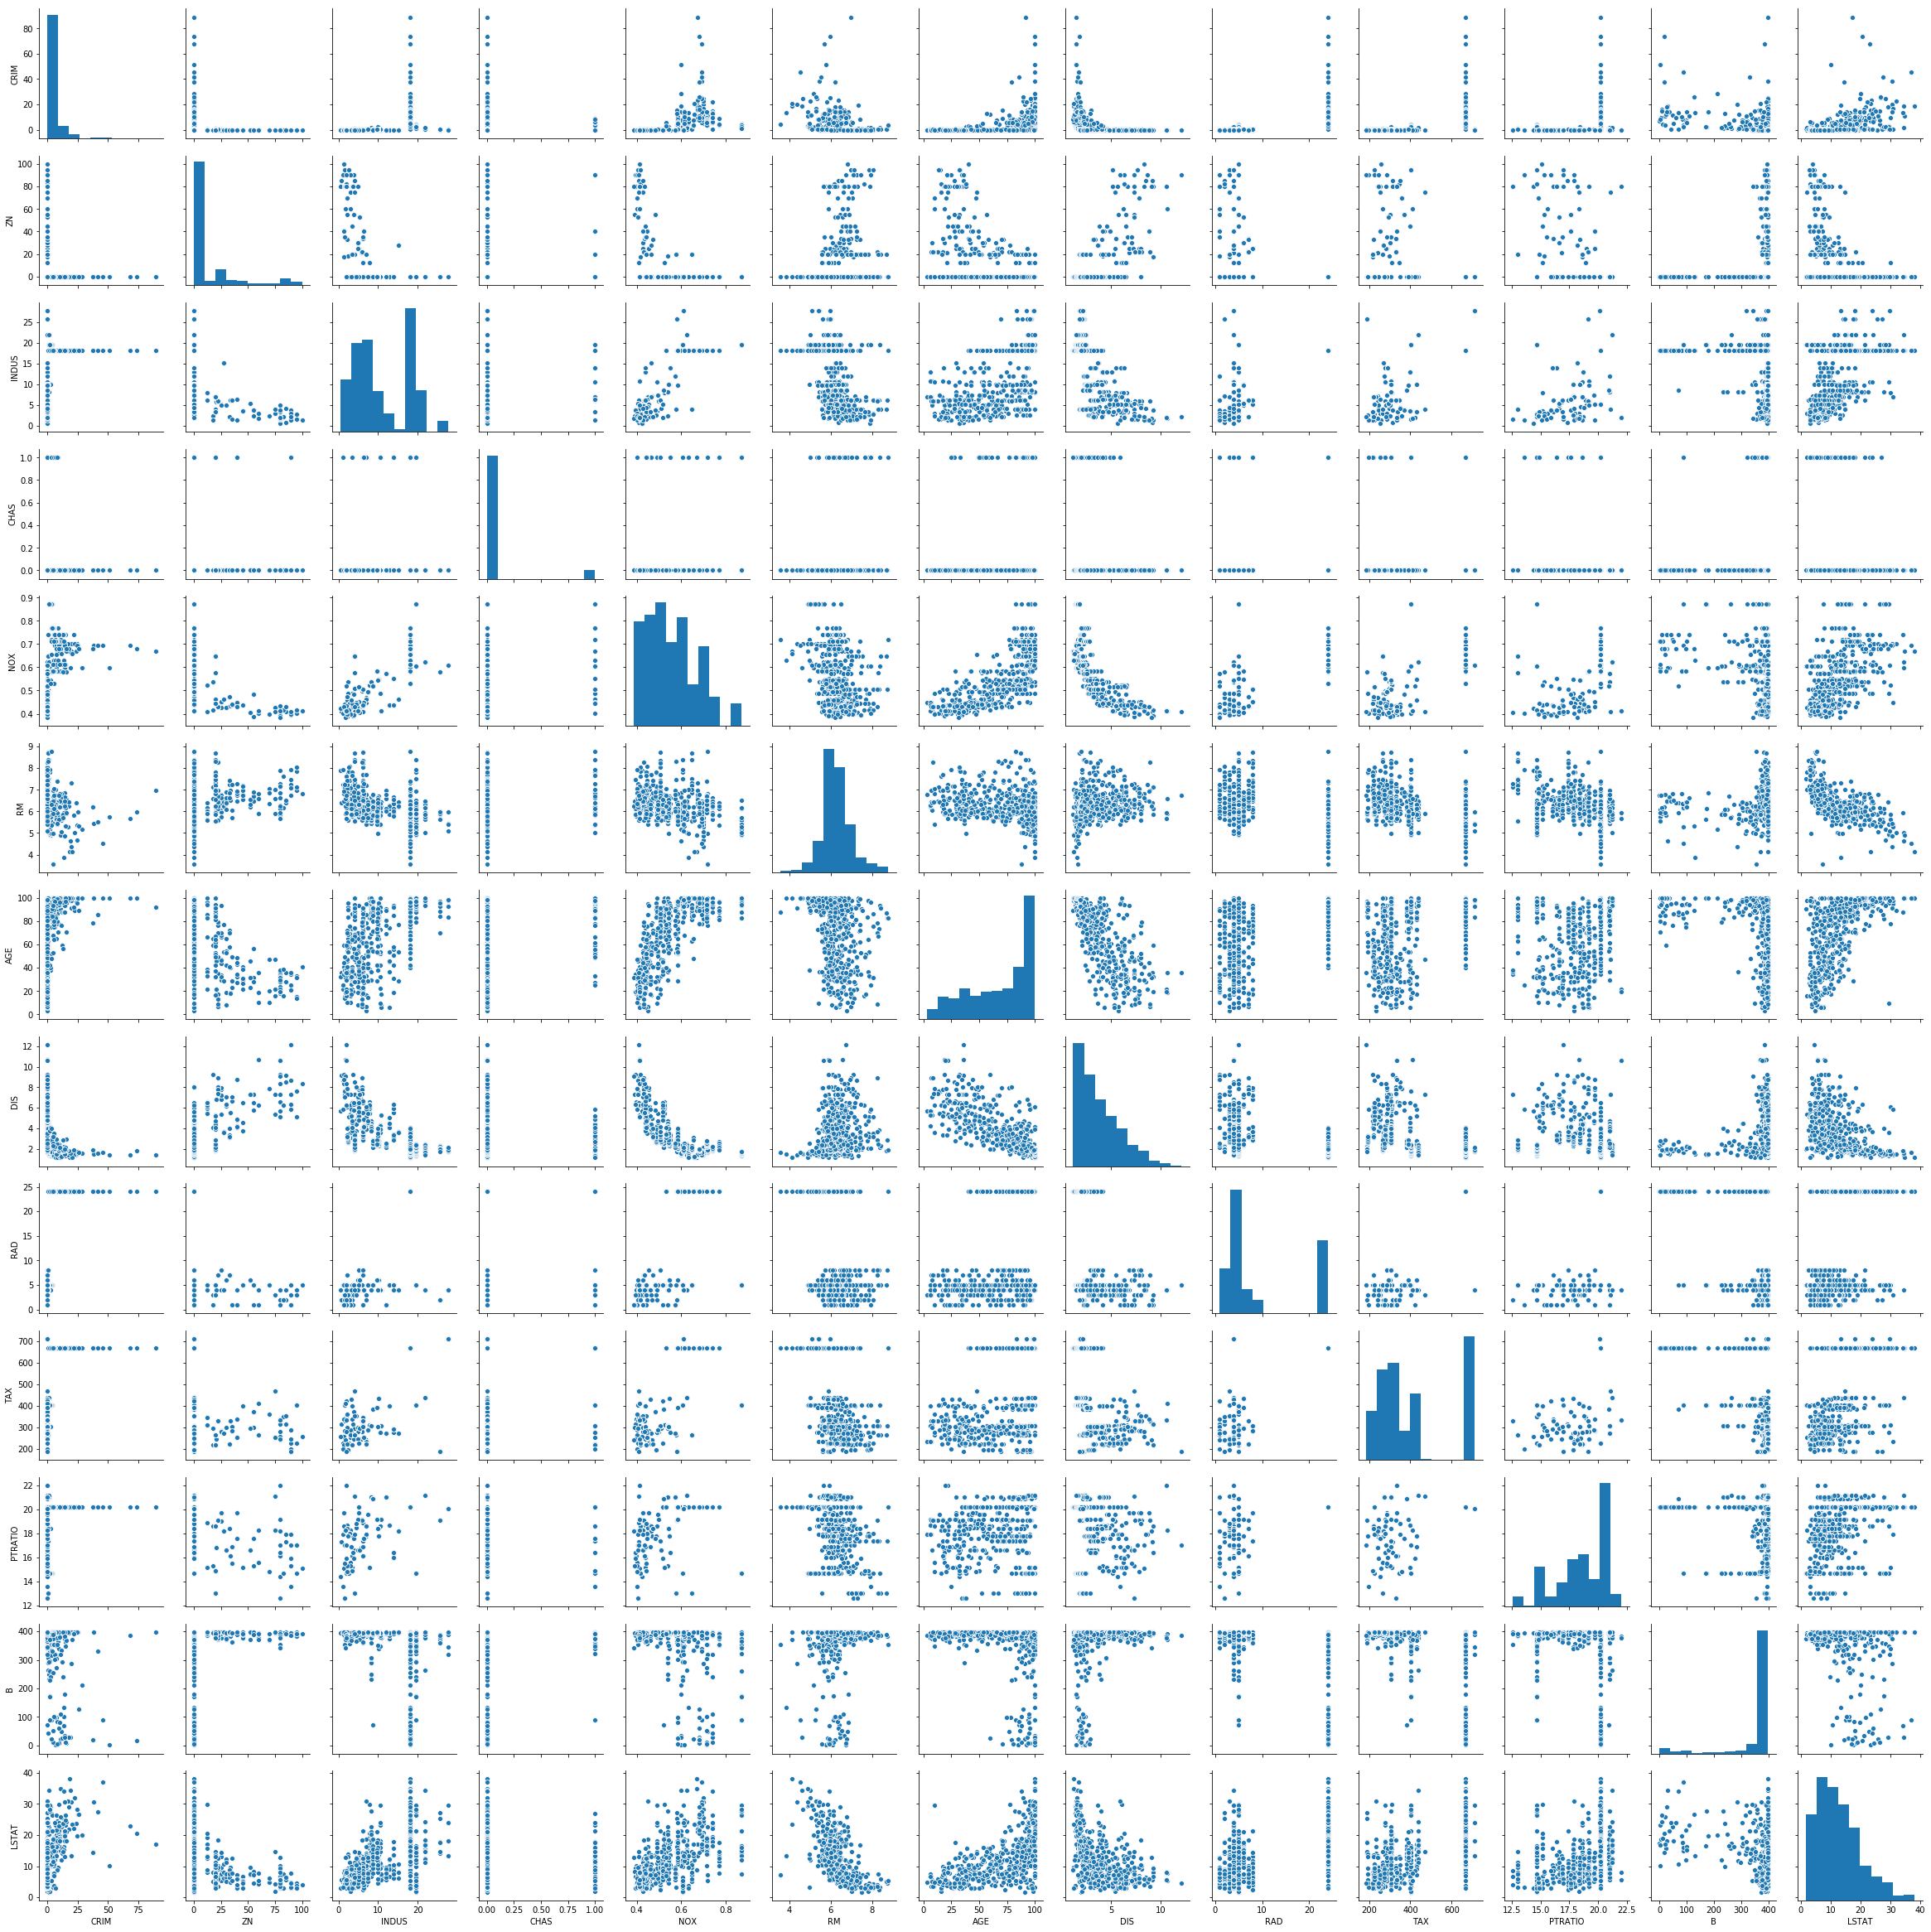

In [5]:
sns.pairplot(df)

Here, we try to model nitric oxides concentration (_NOX_ feature) based on the weighted distances to five Boston employment centres (_DIS_ feature) as they show a linear dependancy. We use the attribute _values_ to get the data in _numpy_ format which is more convenient when working with only numerical data.

In [6]:
data = df[['DIS','NOX']].values

We define the _forward_ function as the function whose arguments are a 1 dimensional input vector and parameters which are slope and intercept. It multiplies the input by the slope and then adds the intercept to achieve the output.

In [7]:
def forward(X, params):
    # 2d Line Z = aX + b
    return X.dot(params[:1]) + params[1]

Here, the cost function is defined based on what we have discussed above regaring $\ell_{p}$-norms. Here we use a function in the _numpy_ library that does the computation for us.

In [8]:
def cost_function(params, X, y, p):
    error_vector = y - forward(X, params)
    return np.linalg.norm(error_vector, ord=p)    

Below, we first start by a scatter plot of the data in the first two lines. For the lines we want to plot, we need the indeces to the minimum and the maximum $x$ the data has. We compute that in the next line. Using those two $x$ values indeces and after having the slope and the intercept computed based on a specific $\ell_{p}$-norm, we can plot the lines.
<br>
<br>
In a loop, for every value of $p$ in an array of different values for $p$ for the $L^{p}$-norm, we provide the cost function, the initial values for the slope and intercept to be minimized, and the value $p$ to the minimizer. After getting the optimal values, we use the $forward$ function to get the corresponding $\hat{y}$ vector. Using the $x$ indeces, we get the corresponding values in $\hat{y}$ and then plot the lines.

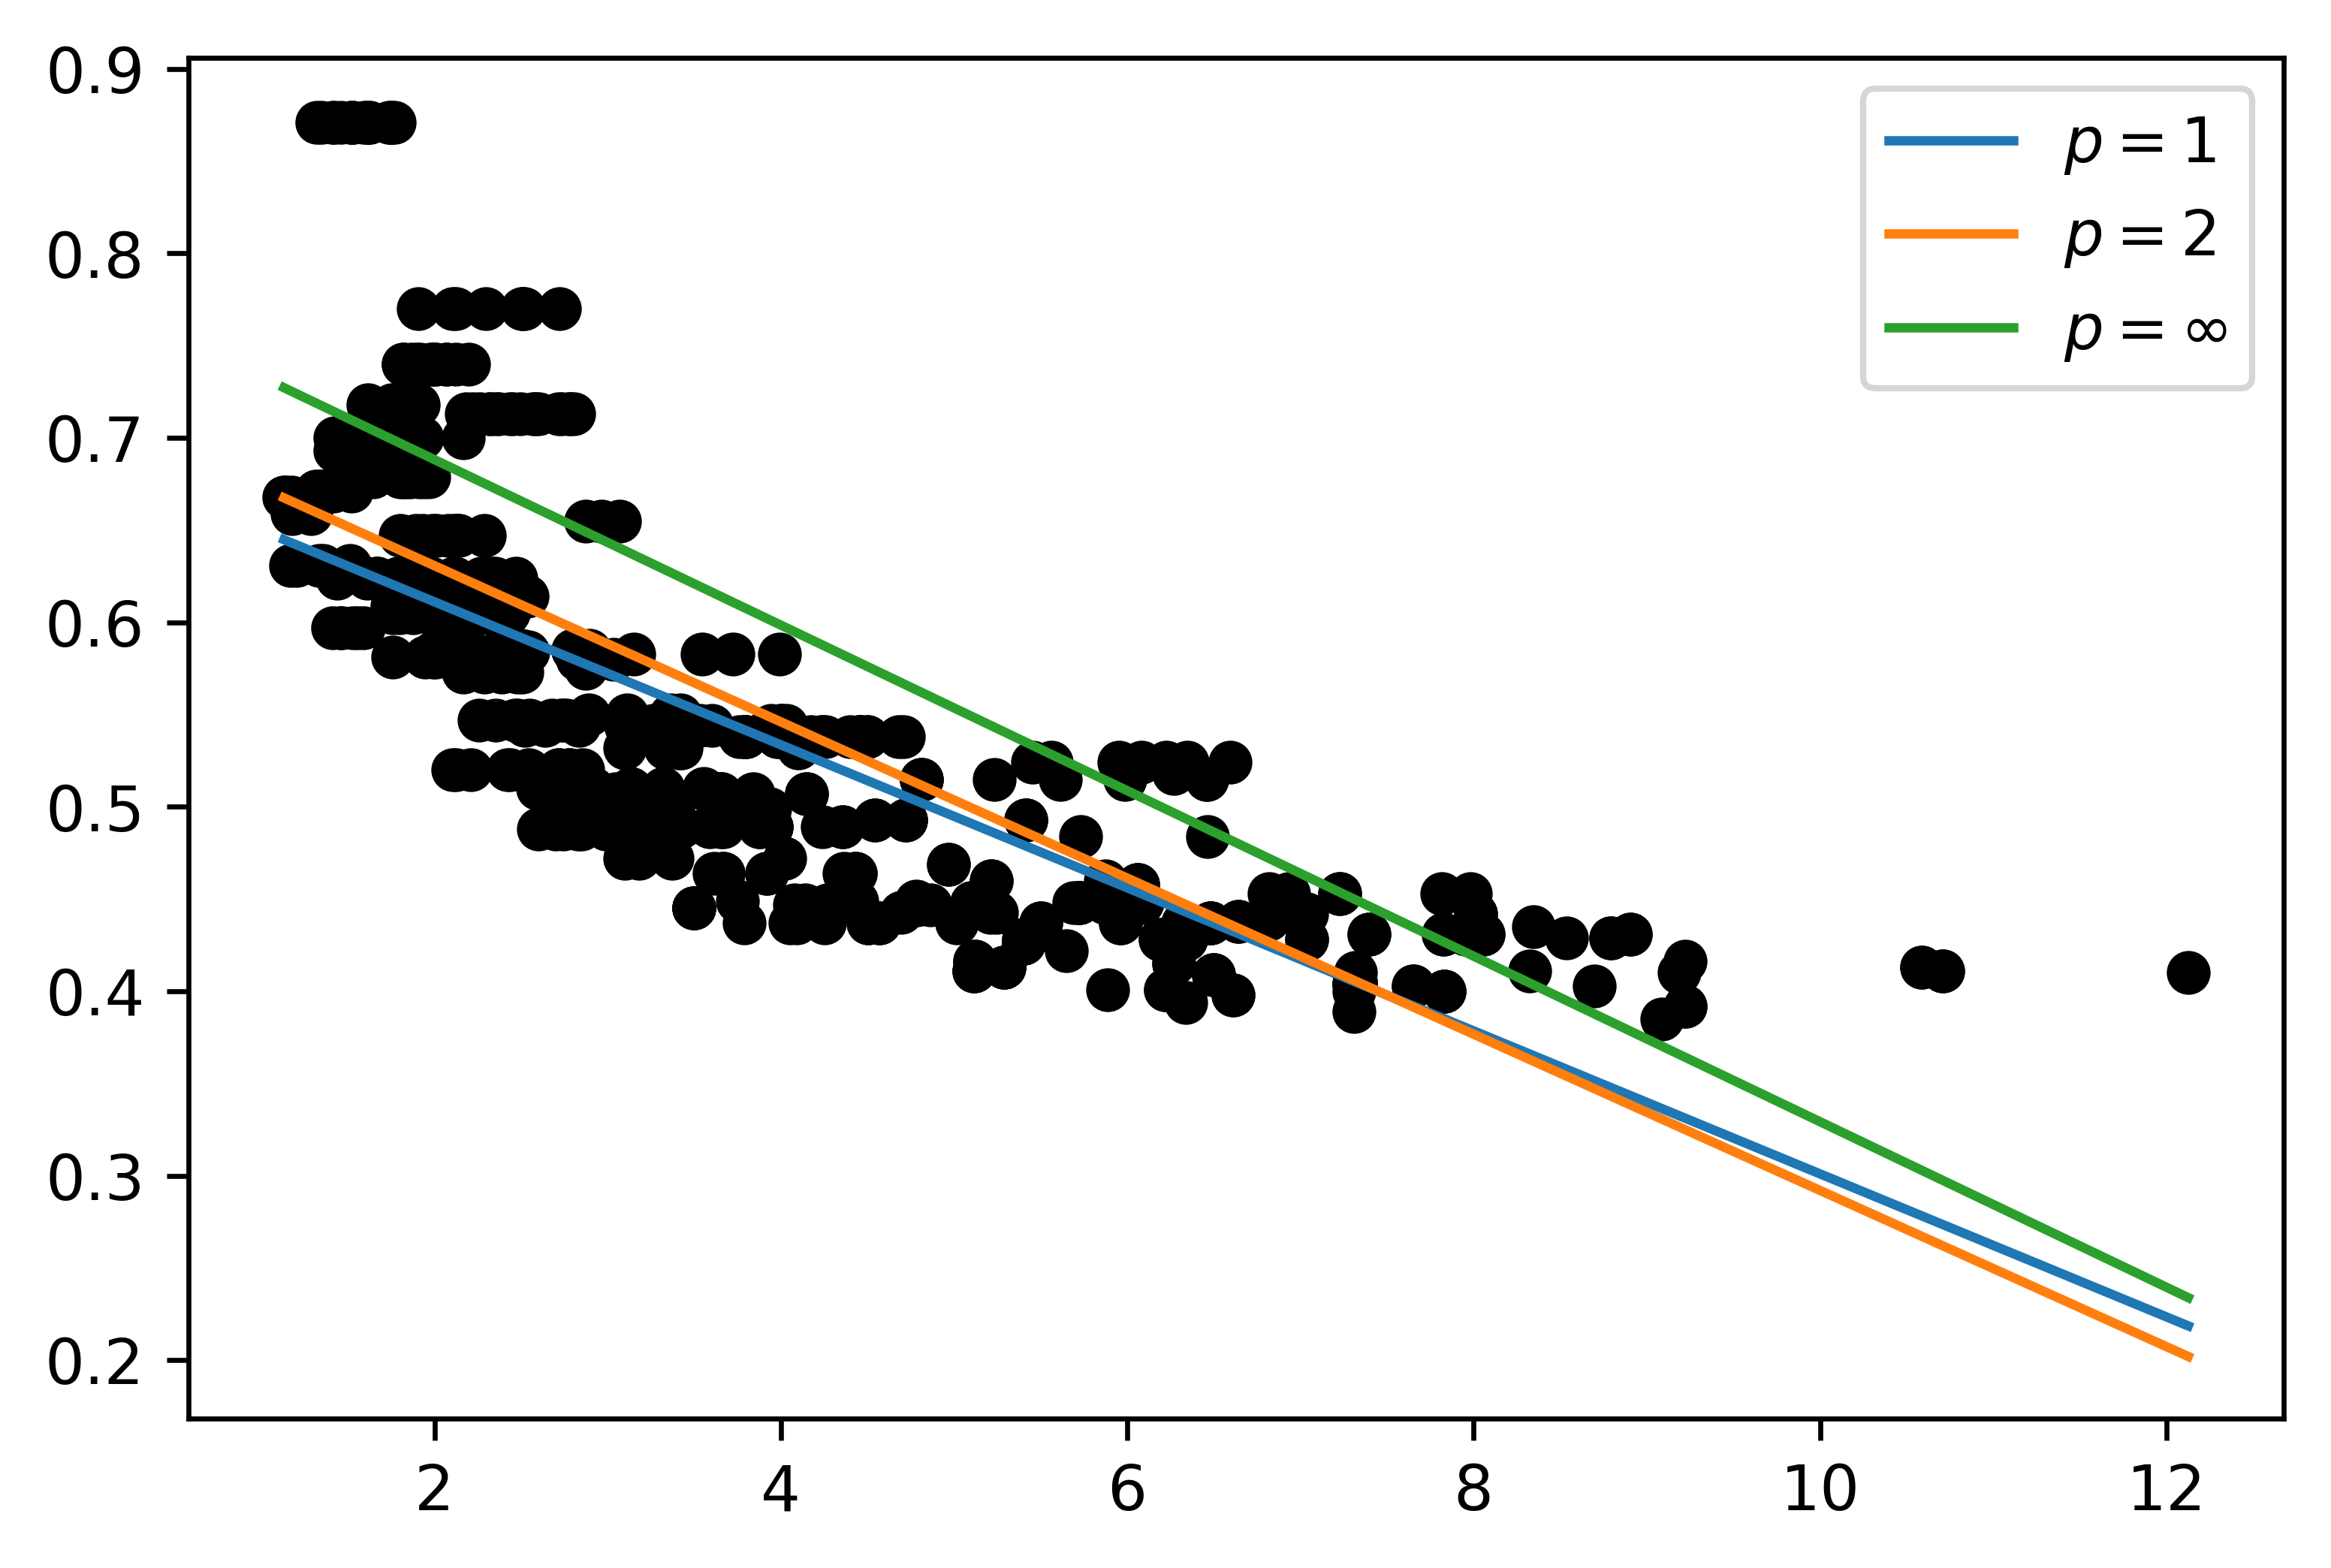

In [11]:
plt.figure(dpi=600)
plt.scatter(data[:,0], data[:, 1], color = 'black')
x_arg = [np.argmin(data[:,0]), np.argmax(data[:,0])]

for p in [1, 2, np.inf]:

    output = minimize(cost_function, [0.5,0.5], args=(np.c_[data[:,0]], data[:, 1], p))
    y_hat = forward(np.c_[data[:,0]], output.x)
    x_min, x_max, y_min, y_max  = data[x_arg[0],0], data[x_arg[1],0], y_hat[x_arg[0]], y_hat[x_arg[1]]
    
    if p!=np.inf:
        label = '$p=%d$'%p
    else:
        label = r'$p=\infty$'
        
    plt.plot([x_min, x_max], [y_min, y_max], label = label)

plt.legend()
plt.show()

As can be seen, the line corresponding to $p=1$ seems to fit the line that seems to underlie the data better and the larger $p$ gets, the more sensitive the model gets to outliers because the errors get exaggerated. As we will see in regularization, $\ell_{1}$-norm encourages more values to be zero, therefore it will be closer to the underlying line in the data. As the value of $p$ gets larger, this property wears off more and reaches a saturation point which is the line obtained using $\ell_{\infty}$-norm. Optimizing the $\ell_{\infty}$-norm means that we minimize jus the maximum error obtained by our line. The property of error exaggeration observed in $p \gt 1$ can also be helpful when the outliers are not abundant since the model gets more penalized for the errors so better values can be chosen. Therefore, there is a tradeoff on the value $p$ for $\ell_{\infty}$-norm loss function and it is believed that in many cases $p=2$ ($\ell_{2}$-norm, RSS in class) yields the best tradeoff point.

## What We Have Learned

In this notebook, we learned the following:
* The vector of residuals needs to be summarized into a number for model evaluation. 
* Definition of $\ell_{p}$-norms
* Training using different loss functions, here $\ell_{p}$-norms, leads to different models
* Different $\ell_{p}$-norms serve different purposes and the best value for $p$ is data dependant

Hope you have enjoyed this lesson!